# Part I - (Dataset Exploration Title)
## by (your name here)

## Introduction
> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
#checking numbers of rows and columns
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
#getting all the columns
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [6]:
#getting a statistical summary of the data
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


### What is the structure of your dataset?

1. The data contains 183412 rows and 16 columns

2. In the data set most variables are numeric, but some variable like start_station_name, end_station_name, user_type and member_gender contains qualitative nominal variables


### What is/are the main feature(s) of interest in your dataset?

1. I would love to see how trip duration is determined by other variables in the data set

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

1. I would love to exolore how start stations and end stations will affect duration. The user_type, The age and gender of users may also be an helpful variables that might affect trip duration.

## Data Cleaning

In [7]:
#making a copy

Bike_df = df.copy()

## 1) Define


##### Droping non values


###  Code

In [8]:
Bike_df.dropna(axis = 0, inplace = True)

### Test

In [9]:
Bike_df.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

## 2) Define


#####  changing data types


###  Code

In [10]:
### changing data types
Bike_df.start_time = pd.to_datetime(df.start_time)
Bike_df.end_time = pd.to_datetime(df.end_time)
Bike_df.start_date = pd.to_datetime(df['start_time']).dt.date
Bike_df.end_date = pd.to_datetime(df['end_time']).dt.date;

### Test code

In [11]:
Bike_df.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

## 3) Define


#####  changing years to age


###  Code

In [12]:
# Age will have only age in number
Bike_df['member_birth_year'] = 2019 - Bike_df.member_birth_year;

### Test code

In [13]:
Bike_df.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,35.0,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,47.0,Male,No
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,30.0,Other,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,45.0,Male,Yes
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,60.0,Male,No


## 4) Define


#####  Calculating Distance


###  Code

In [14]:
# function that calculates the distance between two geographical coordinates in kms base on this solution at below link
# https://gist.github.com/rochacbruno/2883505
import math
def Distance(row):
    lat1 = row['start_station_latitude']
    lon1 = row['start_station_longitude']
    lat2 = row['end_station_latitude']
    lon2 = row['end_station_longitude']
    radius = 6371 # km radius of earth
    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c
    return d

In [15]:
Bike_df['distance'] = df.apply(lambda row: Distance(row), axis=1)

### Test

In [16]:
Bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,35.0,Male,No,0.544709
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,47.0,Male,No,2.704545
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,30.0,Other,No,0.260739
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,45.0,Male,Yes,2.409301
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,60.0,Male,No,3.332203


## 4) Define


#####  extracting days and time.


###  Code

In [17]:
# assign proper data types to the start_time
Bike_df['start_time'] = pd.to_datetime(Bike_df['start_time'])

In [18]:
# extract day of the week
Bike_df['day_of_week'] = pd.DatetimeIndex(Bike_df['start_time']).strftime('%A')
# extract the time of the day
Bike_df['start_hour'] = Bike_df['start_time'].apply(lambda time: time.hour)
Bike_df['time_of_day'] = 'Morning'
Bike_df['time_of_day'][(Bike_df['start_hour'] >= 12) & (Bike_df['start_hour'] <= 17)] = 'Afternoon'
Bike_df['time_of_day'][(Bike_df['start_hour'] >= 18) & (Bike_df['start_hour'] <= 23)] = 'Night'

#### Test

In [19]:
Bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,day_of_week,start_hour,time_of_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,35.0,Male,No,0.544709,Thursday,17,Afternoon
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,47.0,Male,No,2.704545,Thursday,12,Afternoon
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,30.0,Other,No,0.260739,Thursday,17,Afternoon
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,45.0,Male,Yes,2.409301,Thursday,23,Night
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,60.0,Male,No,3.332203,Thursday,23,Night


## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


####  Exploring which gender used bikes the most

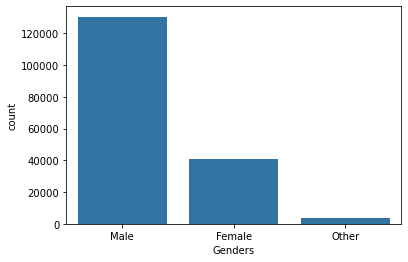

In [20]:
# Returns a Series
freq = Bike_df['member_gender'].value_counts()

# setting the color
base_color = sb.color_palette()[0]

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=Bike_df, x='member_gender', color= base_color, order=gen_order)
# Labeling the axes
plt.xlabel('Genders')
plt.ylabel('count')

# Dsiplay the plot
plt.show();

##### Note: The bar chart indicates that more Males used bikes more that any other gender.

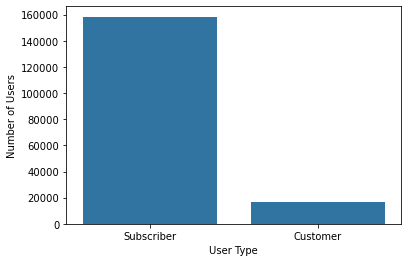

In [21]:
# Returns a Series
freq = Bike_df['user_type'].value_counts()

# setting the color
base_color = sb.color_palette()[0]

# Get the indexes of the Series
gen_order = freq.index

# Plot the bar chart in the decreasing order of the frequency of the `generation_id`
sb.countplot(data=Bike_df, x='user_type', color= base_color, order=gen_order)
# Labeling the axes
plt.xlabel('User Type')
plt.ylabel('Number of Users')

# Dsiplay the plot
plt.show();

#### 

##### Note: bike users are mostly subscribers,

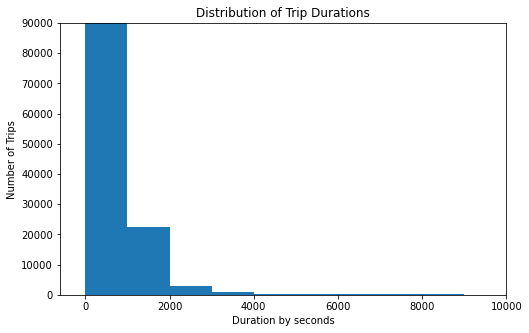

In [22]:
binsize = 1000
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration by seconds')
plt.ylabel('Number of Trips')
plt.axis([-600, 10000, 0, 90000])
plt.show()

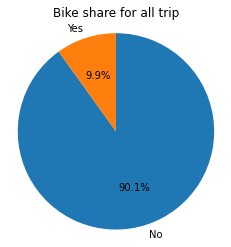

In [23]:
# Use the same pokemon dataset
sorted_counts = Bike_df['bike_share_for_all_trip'].value_counts()

plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90, counterclock = False, autopct='%1.1f%%')

# We have the used option `Square`. 
plt.axis('square')
plt.title('Bike share for all trip');

> The bike share was not used for all of the commuter’s trip.

In [24]:
Bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,day_of_week,start_hour,time_of_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,35.0,Male,No,0.544709,Thursday,17,Afternoon
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,47.0,Male,No,2.704545,Thursday,12,Afternoon
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,30.0,Other,No,0.260739,Thursday,17,Afternoon
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,45.0,Male,Yes,2.409301,Thursday,23,Night
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,60.0,Male,No,3.332203,Thursday,23,Night


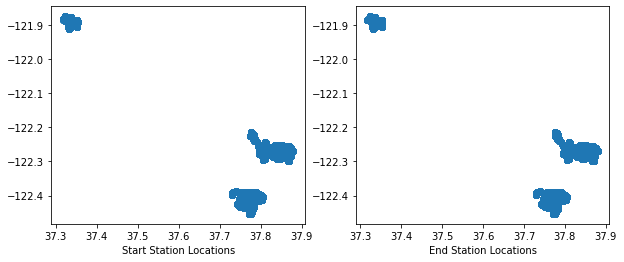

In [25]:
# plot the distribution of location
plt.figure(figsize=[10, 4])

plt.subplot(1, 2, 1)
plt.scatter(data=Bike_df, x='start_station_latitude', y='start_station_longitude')
plt.xlabel('Start Station Locations')

plt.subplot(1, 2, 2)
plt.scatter(data= Bike_df, x='end_station_latitude', y='end_station_longitude')
plt.xlabel('End Station Locations');

> End location and start location are nearly in the same location.  These distances are not very far.

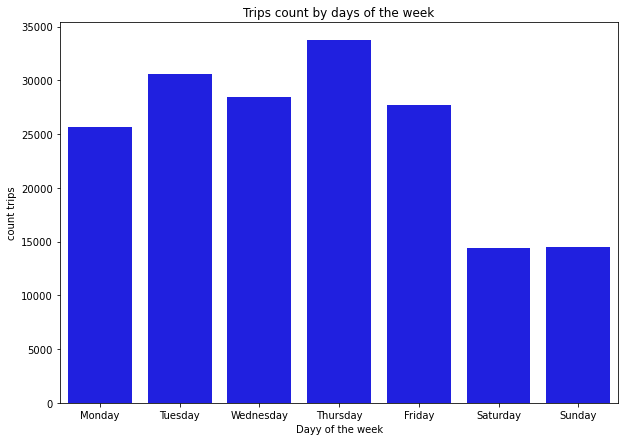

In [26]:
days= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=[10, 7])


sb.countplot(data = Bike_df, x = 'day_of_week', order= days, color = 'blue' )

plt.title('Trips count by days of the week')
plt.xlabel('Dayy of the week')
plt.ylabel('count trips');
plt.show()

The plot indicates that Thursdays has the highest numbers of trips

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The dataset have more males than females

> subscribers are more than customers

> End location and start location are nearly in the same location.  These distances are not very far.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I dropped the rows with empty cells because empty cells can potentially give you a wrong result when you analyze data.

## Bivariate Exploration



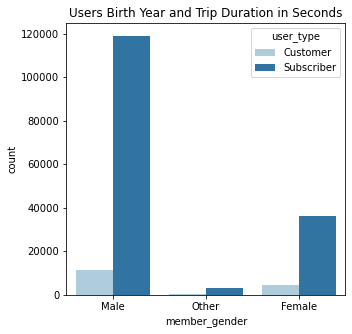

In [27]:
plt.figure(figsize = [5, 5]);
sb.set_palette("Paired")
sb.countplot(data = Bike_df, x = 'member_gender', hue = 'user_type');

plt.title('Users Birth Year and Trip Duration in Seconds');

> The subscriber user number are way greater for both genders

Text(0, 0.5, 'Duaration (sec)')

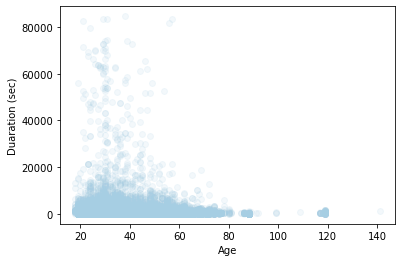

In [28]:
plt.scatter(data = Bike_df, x = 'member_birth_year', y = 'duration_sec', alpha = 1/8)
  
plt.xlabel('Age')
plt.ylabel('Duaration (sec)')

The scatter plot indicates that most of the Duration is below 40,000 seconds and age distribution is below years old. We can investogate to see which age range has the most duration below.

Text(0, 0.5, 'Duration_sec')

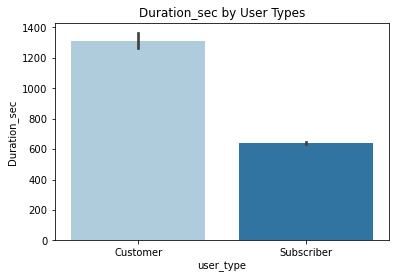

In [29]:
sb.barplot(x='user_type', y='duration_sec', data= Bike_df)
plt.title("Duration_sec by User Types")
plt.ylabel("Duration_sec")

In [30]:
Bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,day_of_week,start_hour,time_of_day
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,35.0,Male,No,0.544709,Thursday,17,Afternoon
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,47.0,Male,No,2.704545,Thursday,12,Afternoon
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,30.0,Other,No,0.260739,Thursday,17,Afternoon
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,45.0,Male,Yes,2.409301,Thursday,23,Night
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,60.0,Male,No,3.332203,Thursday,23,Night


In [31]:
max_age = str(int(Bike_df.member_birth_year.max()))
Bike_df['age_bin'] = Bike_df['member_birth_year'].apply(lambda x: '10 - 20' if 10<x<=20 else 
                                                  '21 - 30' if 20<x<=30 else
                                                  '31 - 40' if 30<x<=40 else 
                                                  '41 - 50' if 40<x<=50 else
                                                  '51 - 60' if 50<x<=60 else
                                                  '61 - 70' if 60<x<=70 else
                                                  '71 - 80' if 70<x<=80 else
                                                  '81 - '+max_age if 80<x<=float(max_age) else x)

# test
display(Bike_df[['age_bin']].head())

,age_bin
0,31 - 40
2,41 - 50
3,21 - 30
4,41 - 50
5,51 - 60


In [32]:
Bike_df.age_bin.unique()

array(['31 - 40', '41 - 50', '21 - 30', '51 - 60', '10 - 20', '61 - 70',
       '71 - 80', '81 - 141'], dtype=object)

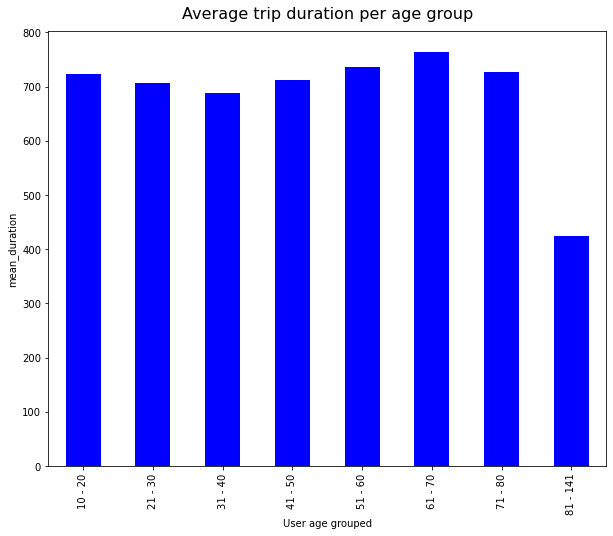

In [33]:
#using the mean of duration seconds to plot a bar chart
data= Bike_df.groupby('age_bin')['duration_sec'].mean()


#.plot(kind='bar', color= colors, figsize=(10,8))
data.plot( kind= 'bar', color= 'blue', figsize=(10,8))
plt.title('Average trip duration per age group', fontsize=16, y=1.015)
plt.xlabel('User age grouped')
plt.ylabel('mean_duration');

The bar chart made it obvious that age doesn't affect the duration of trip.

In [34]:
Bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,day_of_week,start_hour,time_of_day,age_bin
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,35.0,Male,No,0.544709,Thursday,17,Afternoon,31 - 40
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,47.0,Male,No,2.704545,Thursday,12,Afternoon,41 - 50
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,30.0,Other,No,0.260739,Thursday,17,Afternoon,21 - 30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,45.0,Male,Yes,2.409301,Thursday,23,Night,41 - 50
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,60.0,Male,No,3.332203,Thursday,23,Night,51 - 60


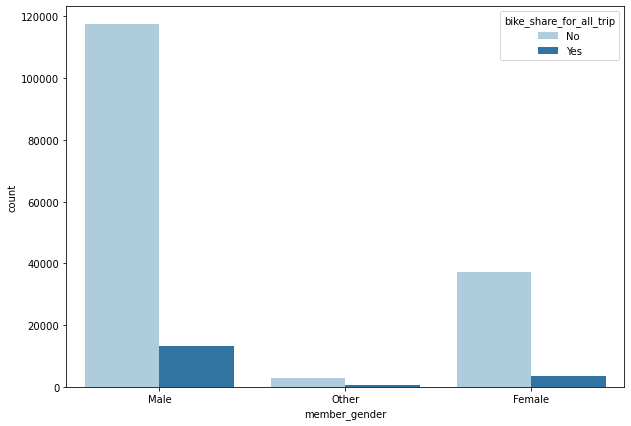

In [35]:
# count plot on two categorical variable
plt.figure(figsize=[10, 7])

sb.countplot(x ='member_gender', hue = "bike_share_for_all_trip", data = Bike_df)
 
# Show the plot
plt.show()

The plot indicates that more males than females don't use the bike sahre for there trips

<Figure size 720x504 with 0 Axes>

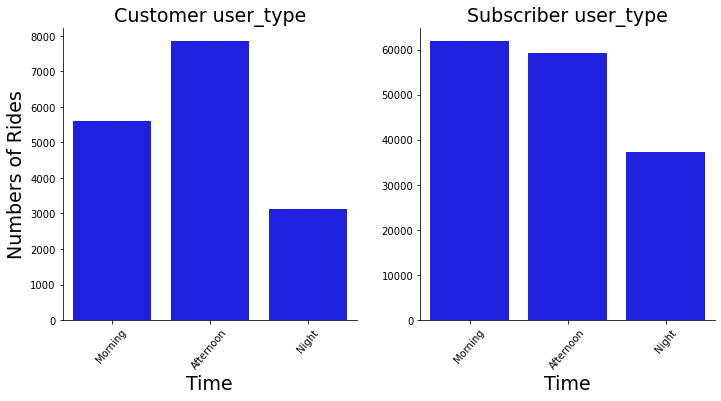

In [36]:
time = ['Morning', 'Afternoon', 'Night']

plt.figure(figsize=[10, 7])
cat_plot = sb.catplot(data= Bike_df, x='time_of_day', col="user_type", kind='count', sharey = False, color = 'blue', order = time)
cat_plot.set_axis_labels("Time", "Numbers of Rides",fontsize=19)
cat_plot.set_titles("{col_name} {col_var}", size=19)
cat_plot.set_xticklabels(rotation = 50)

The data shows that customer type of user uses the trip most in the afternoon while subcriber type of users use the trip most in the morning and afternoon.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The data shows that customer type of user uses the trip most in the afternoon while subcriber type of users use the trip most in the morning and afternoon

>The plot indicates that more males than females don't use the bike sahre for there trips

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observe that the distributions are normal.

>  Though it was helpful but the data was sufficient to gain enough insight.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

In [37]:

Bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,distance,day_of_week,start_hour,time_of_day,age_bin
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,...,4902,Customer,35.0,Male,No,0.544709,Thursday,17,Afternoon,31 - 40
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,47.0,Male,No,2.704545,Thursday,12,Afternoon,41 - 50
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,...,6638,Subscriber,30.0,Other,No,0.260739,Thursday,17,Afternoon,21 - 30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,...,4898,Subscriber,45.0,Male,Yes,2.409301,Thursday,23,Night,41 - 50
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,...,5200,Subscriber,60.0,Male,No,3.332203,Thursday,23,Night,51 - 60


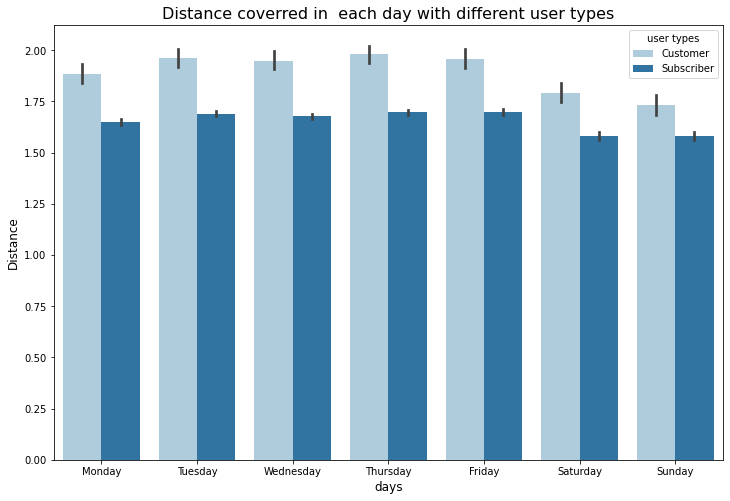

In [38]:

plt.figure(figsize=[12, 8])
sb.barplot(data=Bike_df, x="day_of_week", order = days, y="distance", hue="user_type")
plt.xlabel('days', fontsize=12)
plt.ylabel('Distance', fontsize=12)
plt.title('Distance coverred in  each day with different user types', fontsize=16)
plt.legend(title = 'user types');

Though customer users covered more distance the graph shows there isn't so much difference in distance covered from both user types in each day of the week.

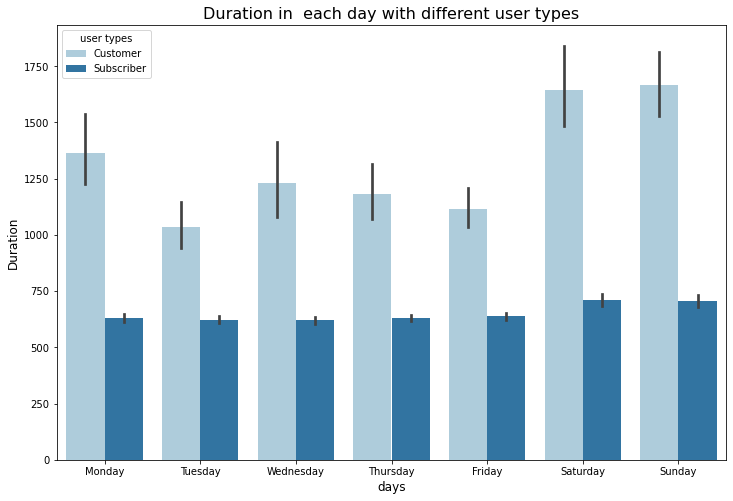

In [39]:
plt.figure(figsize=[12, 8])
sb.barplot(data=Bike_df, x="day_of_week", order = days, y="duration_sec", hue="user_type")
plt.xlabel('days', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.title('Duration in  each day with different user types', fontsize=16)
plt.legend(title = 'user types');

Customer users spend more time using the bike than subscribers. Both have it's highest duration on weekends

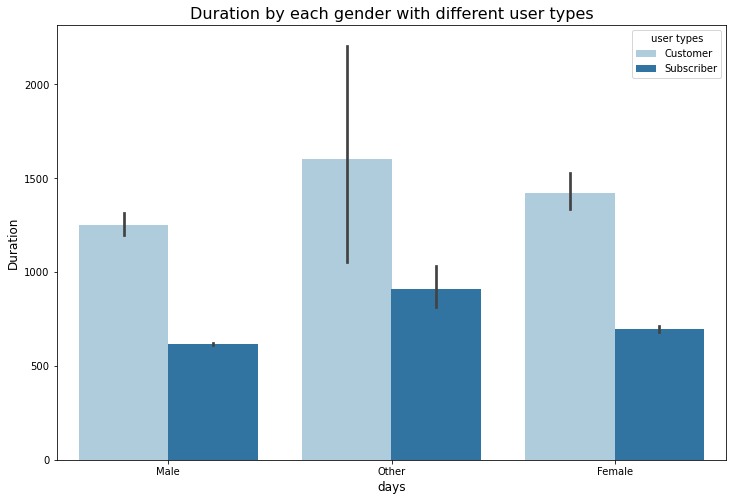

In [40]:
plt.figure(figsize=[12, 8])
sb.barplot(data=Bike_df, x="member_gender", y="duration_sec", hue="user_type")
plt.xlabel('days', fontsize=12)
plt.ylabel('Duration', fontsize=12)
plt.title('Duration by each gender with different user types', fontsize=16)
plt.legend(title = 'user types');

The duration of both male and females are the same in both user type.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
>  Though customer users covered more distance the graph shows there isn't so much difference in distance covered from both user types in each day of the week.

> Customer users spend more time using the bike than subscribers. Both have it's highest duration on weekends

> The duration of both male and females are the same in both user type.
### Were there any interesting or surprising interactions between features?

> Nothing.

## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.

> The data exploration started with cleaning the data which was followed by creating univarate, Bivarates and multivarates vissualizations.

> Major findings are:
 1. The dataset have more males than females

 2. subscribers are more than customers
 
 3. The subscriber user number are way greater for both genders. 
 
 4. I observed that other has one more peak at nearly the age of 60 years for higher duration time. For different user types both are showing similer trends for age and trip duration.





In [41]:
# save all changes made to a new csv
Bike_df.to_csv('Bike_df.csv', 
                 index=False, encoding = 'utf-8')